<a href="https://github.com/glebsamarec">Самарец Глєб</a>, 2024

# <h1 align="center">Лабораторна робота №1. Побудова простого лінійного бінарного класифікатора
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
    <li>Імпортував дані для навчальної вибірки згідно з індивідуальним варіантом .</li>
    <li>Побудував бінарний класифікатор і вивів результати бінарної класифікації на графіку. 

</ol>

[0.7999999999999999, -1]


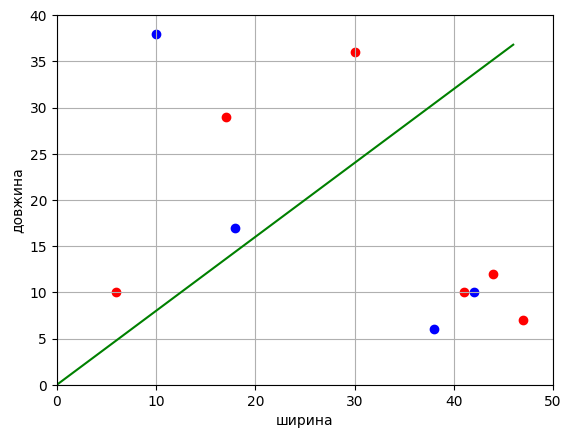

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def classifier(x_train, y_train):

    change = True  # Змінна для перевірки змін у вагах
    n_train = len(x_train)  # Розмір навчального набору даних
    w = [0, -1]  # Початкове значення вектора ваги
    a = lambda x: np.sign(x[0] * w[0] + x[1] * w[1])  # Правило класифікації
    L = 0.1  # Крок зміни ваги
    e = 0.1  # Невелика додаткова величина до w0, щоб забезпечити зазор між лінією розділення та областю
    count = 0  # Лічильник ітерацій
    last_error_index = -1  # Індекс останньої помилково класифікованої спостереження
    while change and count < 100:
        change = False
        for i in range(n_train):  # Ітерація по спостереженням
            if y_train[i] * a(x_train[i]) < 0:  # Якщо помилка класифікації,
                w[0] = w[0] + L * y_train[i]  # То коригування ваги w0
                last_error_index = i
                change = True

        Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
        if Q == 0:  # Показник якості класифікації (кількість помилок)
            break  # Зупинка, якщо всі класифікуються правильно
        count += 1
    if last_error_index > -1:
        w[0] = w[0] + e * y_train[last_error_index]

    print(w)

    line_x = list(range(max(x_train[:, 0])))  # Створення графіка роздільної лінії
    line_y = [w[0] * x for x in line_x]

    x_0 = x_train[y_train == 1]  # Формування точок для 1-го класу
    x_1 = x_train[y_train == -1]  # та 2-го класу

    plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
    plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
    plt.plot(line_x, line_y, color='green')

    plt.xlim([0, 50])
    plt.ylim([0, 40])
    plt.ylabel("довжина")
    plt.xlabel("ширина")
    plt.grid(True)
    plt.show()

x_train_2 = np.array([[17, 29], [44, 12], [47, 7], [18, 17], [30, 36], [6, 10], [38, 6], [10, 38], [41, 10], [42, 10]])
y_train_2 = np.array([1, 1, 1, -1, 1, 1, -1, -1, 1, -1])
classifier(x_train_2, y_train_2)


<h1 align="center">Контрольні запитання</h1>

1.Які основні принципи лежать в основі розпізнавання образів у контексті машинного навчання? <br><br>
   <b>Основні принципи розпізнавання образів у контексті машинного навчання включають:

- Використання алгоритмів і моделей, що здатні автоматично визначати закономірності та взаємозв'язки у вхідних даних.
- Використання навчальних даних для навчання моделі на відповідь на певний запит або класифікацію.
- Етап тестування, під час якого модель перевіряється на нових даних, які не брали участь у навчанні. </b><br><br>
2.Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів? <br><br>
   <b>Навчальна вибірка - це набір даних, який використовується для навчання моделі в машинному навчанні. Це важливо, оскільки якість та репрезентативність навчальної вибірки безпосередньо впливають на якість навчання моделі. Чим більш репрезентативна навчальна вибірка, тим краще модель може узагальнити знання на нові дані. </b><br><br>
3.Зформулювати постановку задачі бінарної класифікації.<br><br>
   <b> 
Постановка задачі бінарної класифікації полягає в тому, щоб визначити, до якого з двох класів належить певний вхідний об'єкт чи образ. Наприклад, це може бути визначення, чи на зображенні зображений кіт чи собака, чи електронне повідомлення є спамом чи ні.</b><br><br>
4.Що таке рівняння гіперплощини, і як воно використовується для розв’язання задачі бінарної класифікації?
<br><br>
   <b> Рівняння гіперплощини - це математична модель, яка використовується для розділення простору на дві класові області. У контексті бінарної класифікації, рівняння гіперплощини визначає границю між областями, які відповідають різним класам. Після навчання моделі рівняння гіперплощини використовується для прогнозування класу нових об'єктів на основі їх характеристик. </b><br><br>
5.Наведіть кроки для розв’язання простої задачі бінарної класифікації за допомогою машинного навчання.<br><br>
<b>Кроки для розв'язання простої задачі бінарної класифікації за допомогою машинного навчання можуть включати:

- Збір та підготовка навчальних даних.
- Вибір моделі для навчання, наприклад, логістична регресія, метод опорних векторів тощо.
- Розділення даних на навчальні та тестові набори.
- Навчання моделі на навчальних даних.
- Оцінка та тестування навчаної моделі на тестових даних.
- Оцінка та аналіз результатів, включаючи точність класифікації та матрицю плутанини.  </b>